In [ ]:
from google.colab import files


uploaded = files.upload()


# Loading the Dataset

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Telconnect data.csv']))
print(df)

      customerID  gender  SeniorCitizen Has_Partner Has_Dependents  \
0     7590-VHVEG  Female              0         Yes             No   
1     5575-GNVDE    Male              0          No             No   
2     3668-QPYBK    Male              0          No             No   
3     7795-CFOCW    Male              0          No             No   
4     9237-HQITU  Female              0          No             No   
...          ...     ...            ...         ...            ...   
7038  6840-RESVB    Male              0         Yes            Yes   
7039  2234-XADUH  Female              0         Yes            Yes   
7040  4801-JZAZL  Female              0         Yes            Yes   
7041  8361-LTMKD    Male              1         Yes             No   
7042  3186-AJIEK    Male              0          No             No   

      account_tenure PhoneService     MultipleLines InternetService  \
0                  1           No  No phone service             DSL   
1                

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Has_Partner       7043 non-null   object 
 4   Has_Dependents    7043 non-null   object 
 5   account_tenure    7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Exploration

### Checking for Missing Values

To ensure data quality, we check for missing values in the dataset using the `isnull().sum()` function. This will return the count of missing values in each column.


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Has_Partner         0
Has_Dependents      0
account_tenure      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no missing values in the dataset

### Summary Statistics for Numerical Columns

To get an overview of the dataset, we generate summary statistics for numerical columns using the `describe()` function. This provides insights such as mean, standard deviation, minimum, and maximum values.

In [ ]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

       SeniorCitizen  account_tenure  MonthlyCharges
count    7043.000000     7043.000000     7043.000000
mean        0.162147       32.371149       64.761692
std         0.368612       24.559481       30.090047
min         0.000000        0.000000       18.250000
25%         0.000000        9.000000       35.500000
50%         0.000000       29.000000       70.350000
75%         0.000000       55.000000       89.850000
max         1.000000       72.000000      118.750000


### Key Insights  

- **SeniorCitizen**: Only **16.2%** of customers are senior citizens, with most being non-seniors.  
- **Account Tenure**: Customers have been with the company for **0 to 72 months**, with a **median of 29 months** and **25% having tenure ≤ 9 months**.  
- **Monthly Charges**: Charges range from **$18.25 to $118.75**, with an **average of $64.76** and **median of $70.35**, indicating varied pricing plans.  

**Observations**: Most customers are **non-seniors**, a significant number are **newer customers**, and pricing varies widely across plans.  


### Unique Values in Categorical Columns

To understand the distinct categories in our dataset, we extract unique values for each categorical column. This helps in identifying data inconsistencies and potential preprocessing needs.

In [ ]:
# Unique values in categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Has_Partner', 'Has_Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Has_Partner: ['Yes' 'No']
Has_Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Data Cleaning

### Converting 'TotalCharges' to Numeric and Handling Missing Values

We convert the **'TotalCharges'** column to numeric format using `pd.to_numeric()` and coerce any errors to handle inconsistencies. After that, we check for missing values in the dataset.

In [ ]:
# Convert 'TotalCharges' to numeric, coerce errors to handle any inconsistencies
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]

,0
TotalCharges,11


Missing Values After Conversion: The **'TotalCharges'** column now has **11 missing values**.


### Dropping Rows with Missing 'TotalCharges' Values

We drop rows where the **'TotalCharges'** column has missing values using `dropna()`. Afterward, we check for any remaining missing values in the dataset.

In [ ]:
df = df.dropna(subset=["TotalCharges"])

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]

,0


### Checking for Duplicate Rows

We check for duplicate rows in the dataset using the `duplicated()` function, which identifies and counts any rows that are identical to others.

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# EDA

### Plotting Histograms for Numerical Columns

We plot histograms to visualize the distribution of numerical columns: **'account_tenure'**, **'MonthlyCharges'**, and **'TotalCharges'**. This helps in understanding the spread and skewness of the data.

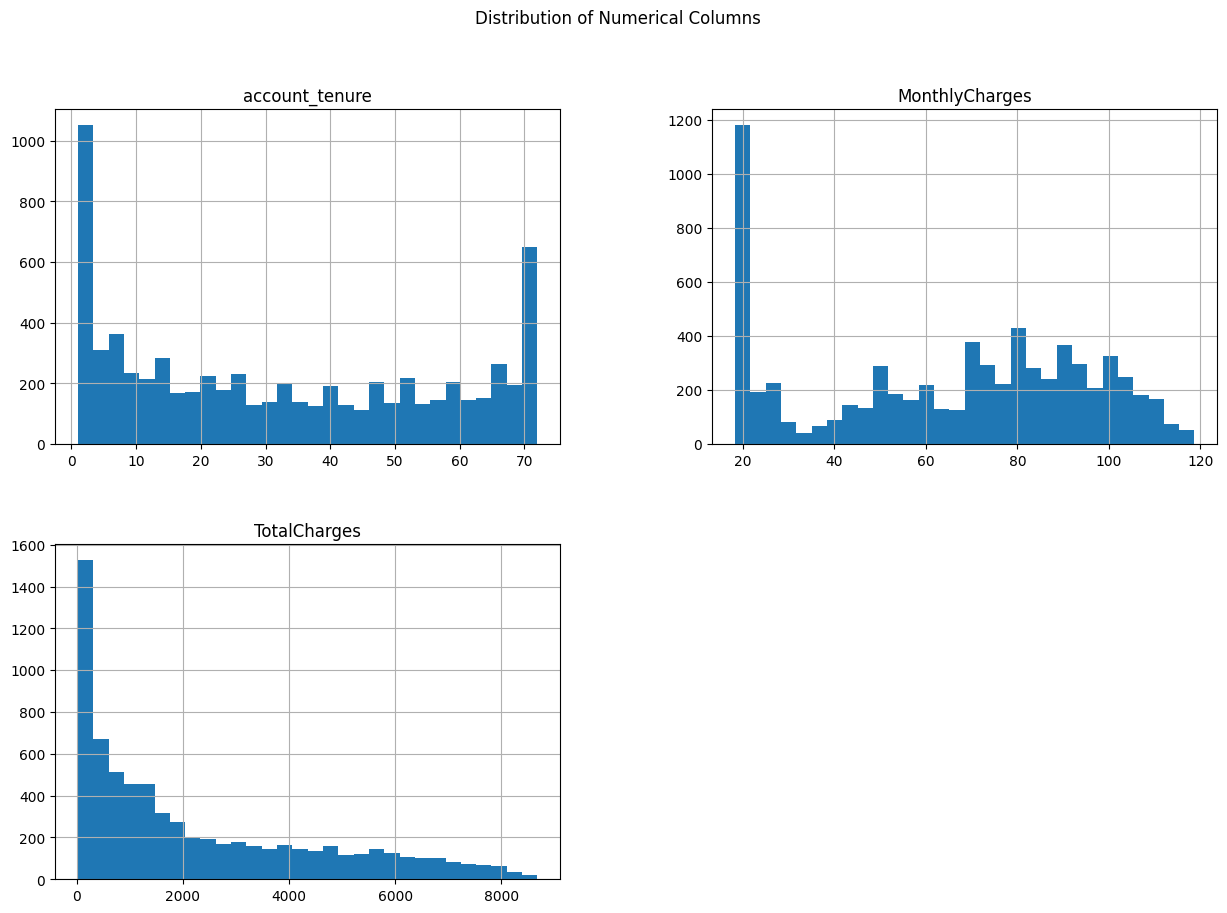

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_columns = ['account_tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

This histogram visualization highlights the distribution of three numerical features in the dataset:

1. **`account_tenure`**: Most customers have either very short (0-10 months) or very long (70+ months) tenures, indicating customer retention challenges early on.
2. **`MonthlyCharges`**: Values are distributed across a wide range, with a concentration around lower charges (~20-40). This suggests many customers opt for basic plans.
3. **`TotalCharges`**: Skewed right due to longer-tenured customers accumulating higher totals, while newer customers have lower totals (near-zero values).

These distributions emphasize the importance of tenure and charges in understanding churn and tailoring strategies for new and long-term customers.

### Churn Rate by Gender, Internet Service, and Contract Type

We visualize the churn rate based on different categorical variables using **count plots**. These plots help to understand how churn varies across these categories:

- **Churn by Gender**: This plot shows the distribution of churn (Yes/No) across male and female customers.
- **Churn by Internet Service**: This plot illustrates how churn is distributed among customers using different types of internet services.
- **Churn by Contract Type**: This plot compares churn rates across different contract types.

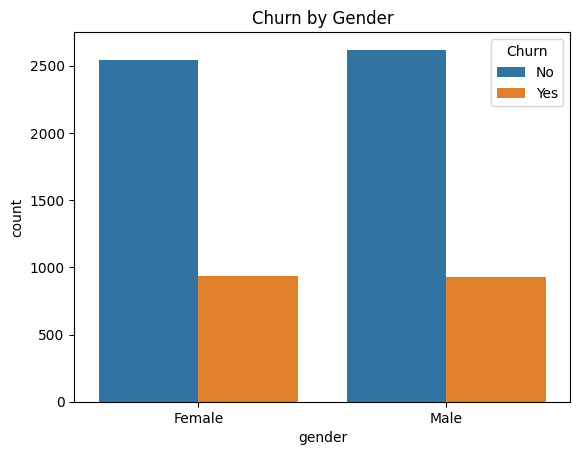

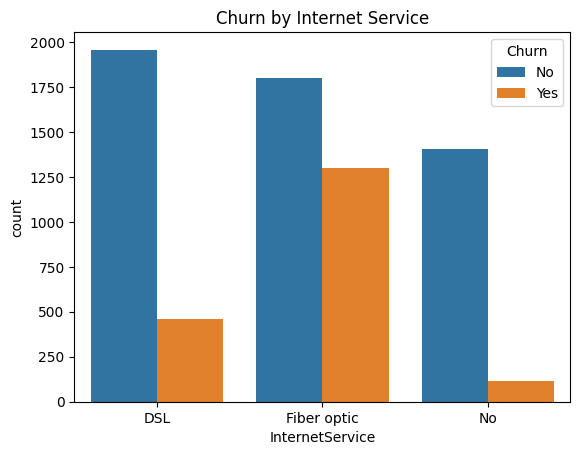

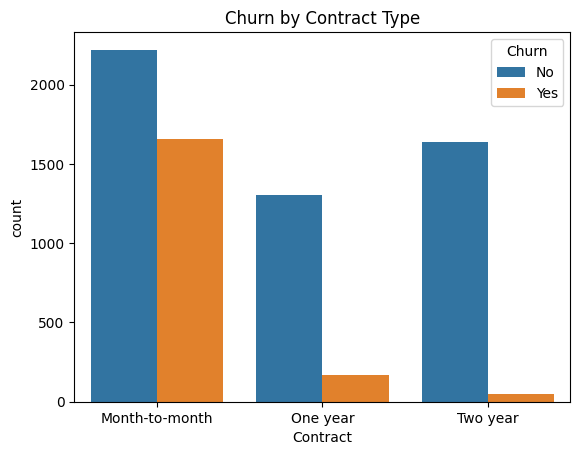

In [ ]:
# Churn rate by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

# Churn rate by InternetService
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

# Churn rate by Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

**Gender**:The chart shows churn distribution by gender. Both male and female customers exhibit a similar churn pattern, with a larger proportion of customers staying (blue bars) compared to those leaving (orange bars). This indicates that gender is not a significant differentiator in predicting churn rates.

**Internet Service type**: The chart shows churn rates by Internet Service: DSL users have high retention, fiber optic users churn more, and those without internet service churn least. Insights suggest targeted strategies to improve retention for each group.

**contract type**: The chart reveals that churn is highest among Month-to-month contract customers, suggesting they are more likely to leave. In contrast, customers with One-year and Two-year contracts have significantly lower churn rates, indicating stronger retention. This pattern suggests that long-term contracts help reduce churn, possibly due to commitments or incentives. Businesses might focus on converting Month-to-month users into long-term contracts to improve retention.



### Churn Rate by Tenure Group

We create **bins for customer tenure** to group customers into different tenure ranges (0-12, 12-24, etc.). Then, we visualize the churn rate across these tenure groups using a **count plot**.

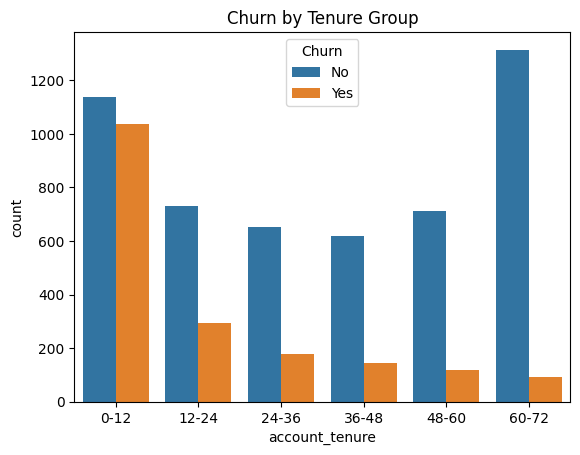

In [ ]:
# Create bins for tenure
sns.countplot(
    x=pd.cut(df['account_tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72']),
    hue=df['Churn'],
    data=df
)
plt.title('Churn by Tenure Group')
plt.show()


This chart shows churn by account tenure. Customers with 0-12 months tenure have the highest churn, while longer-tenured customers churn less. This suggests retention improves over time, emphasizing the importance of early engagement.

### Boxplot of Monthly Charges vs. Churn

We create a **boxplot** to visualize the distribution of **Monthly Charges** for customers who churned (Yes) vs. those who didn't (No). This plot provides insights into how monthly charges differ based on the churn status.

<ipython-input-17-75e6cac68509>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


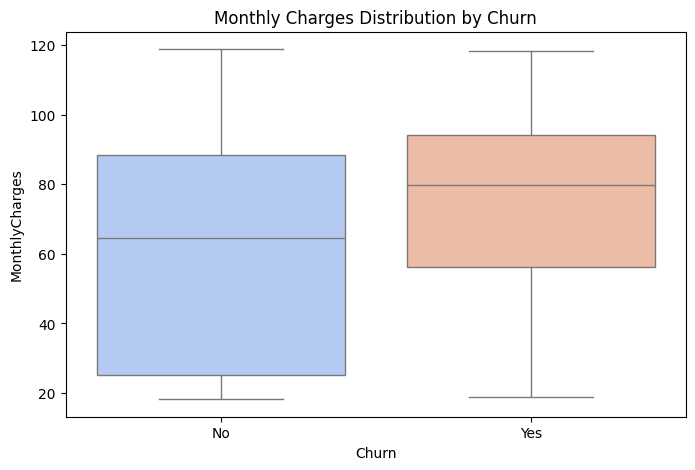

In [ ]:
# Boxplot of Monthly Charges vs. Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges Distribution by Churn")
plt.show()

This boxplot illustrates the distribution of monthly charges for churned and retained customers. Churned customers have a higher median monthly charge, indicating that higher costs may contribute to churn. Retained customers show a wider range of charges, including lower values. Businesses could address this by offering discounts or flexible pricing plans.

# Feature Engineering

### Feature Engineering: Total Services

We create a new feature, **'TotalServices'**, which represents the total number of services each customer has. This is calculated by summing the 'Yes' responses across multiple service-related columns.

In [ ]:
# List of service columns
service_columns = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a new feature for total services
df['TotalServices'] = df[service_columns].apply(lambda x: x == 'Yes').sum(axis=1)

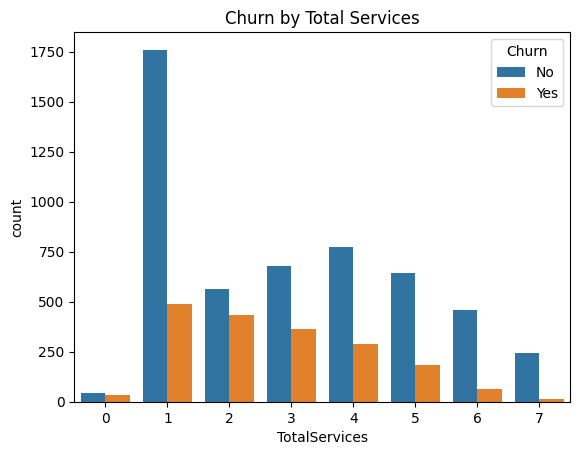

In [ ]:
# Check the distribution of TotalServices
sns.countplot(x='TotalServices', hue='Churn', data=df)
plt.title('Churn by Total Services')
plt.show()

Customers with only one service have the highest churn rate (orange bar), while those with more services tend to churn less frequently. This pattern suggests that customers who subscribe to multiple services are more likely to stay, possibly due to higher engagement or perceived value. Customers with zero services represent a very small population, which likely includes new or inactive accounts. To reduce churn, efforts should focus on encouraging customers with fewer services to explore and subscribe to additional offerings.

### Feature Engineering: Contract Length Mapping

We map the **'Contract'** column to numerical values by creating a new feature, **'ContractLength'**. The mapping is as follows:
- **Month-to-month** → 1
- **One year** → 12
- **Two year** → 24


In [ ]:
# Map Contract to numerical values
df['ContractLength'] = df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Encoding

### Encoding Categorical Variables

We apply **Label Encoding** and **One-Hot Encoding** to transform categorical variables into numerical representations.

1. **Label Encoding** is applied to binary categorical variables (e.g., gender, churn) using `LabelEncoder`. This converts the values into 0 and 1.
2. **One-Hot Encoding** is used for multi-category variables (e.g., services, contract types) using `pd.get_dummies`. We set `drop_first=True` to avoid multicollinearity by dropping the first category.

In [ ]:
categorical_columns = ['gender', 'Has_Partner', 'Has_Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for binary categorical variables
label_encoders = {}
binary_columns = ['gender', 'Has_Partner', 'Has_Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for later use

# One-Hot Encoding for multi-category variables
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
print(df.head())

   customerID  gender  SeniorCitizen  Has_Partner  Has_Dependents  \
0  7590-VHVEG       0              0            1               0   
1  5575-GNVDE       1              0            0               0   
2  3668-QPYBK       1              0            0               0   
3  7795-CFOCW       1              0            0               0   
4  9237-HQITU       0              0            0               0   

   account_tenure  PhoneService  PaperlessBilling  MonthlyCharges  \
0               1             0                 1           29.85   
1              34             1                 0           56.95   
2               2             1                 1           53.85   
3              45             0                 0           42.30   
4               2             1                 1           70.70   

   TotalCharges  ...  TechSupport_Yes  StreamingTV_No internet service  \
0         29.85  ...            False                            False   
1       1889.50  ...  

# Correlation Matrix

### Correlation Analysis with Target Variable

We calculate the correlation matrix to identify the relationships between features and the target variable (**Churn**). The following steps are performed:
1. **Correlation Matrix**: We compute the correlation matrix for all features.
2. **Correlation with Churn**: We specifically look at the correlation of each feature with the target variable, **Churn**.
3. **Top 10 Features**: We extract the top 10 features that have the highest correlation with **Churn**.

In [ ]:

df_encoded = df.drop(columns=["customerID"]).copy()
# Get the correlation matrix and sort by the top 10 correlations
corr_matrix = df_encoded.corr()

# Assuming 'df' is your DataFrame and 'target' is your target column name
correlation_with_target = df_encoded.corr()['Churn'].sort_values(ascending=False)

# Display top N features (e.g., top 10)
top_n_features = correlation_with_target[1:11]  # Exclude the target itself, top 10 features
print(top_n_features)

InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
SeniorCitizen                     0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService                      0.011691
gender                           -0.008545
Name: Churn, dtype: float64


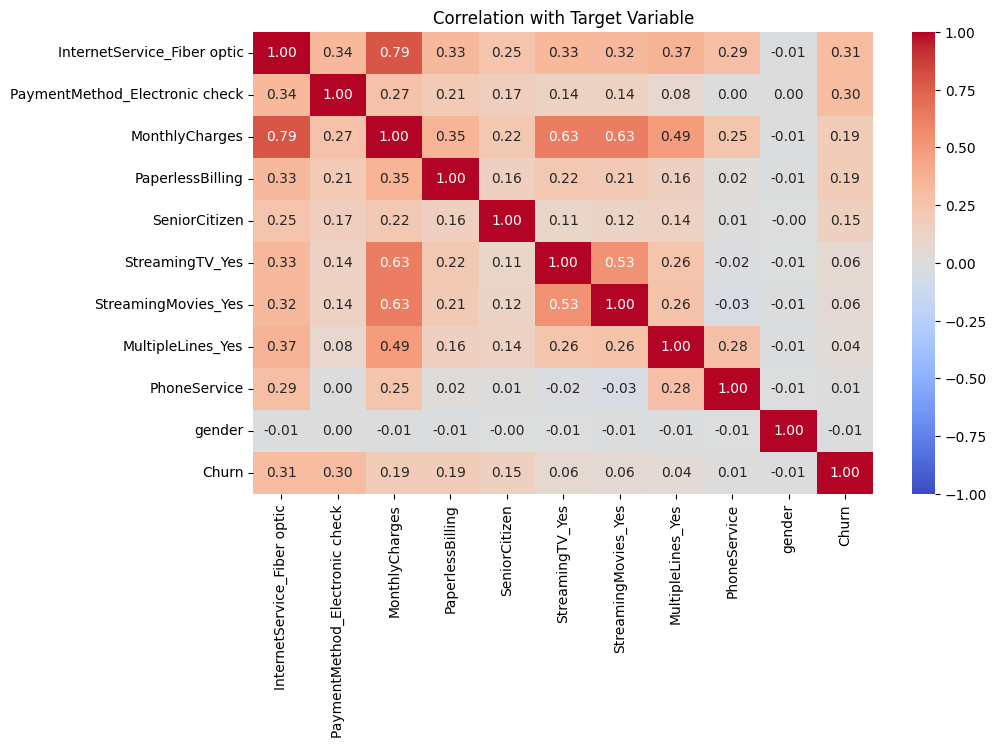

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated the correlation with target and stored in `top_n_features`
correlation_matrix = df[top_n_features.index.tolist() + ['Churn']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation with Target Variable")
plt.show()


The correlation matrix reveals key relationships between features and the churn variable. "InternetService_Fiber optic" and "PaymentMethod_Electronic check" have the highest positive correlations with churn, suggesting customers using fiber optic or electronic checks are more likely to churn. Conversely, features like "MonthlyCharges" and "PaperlessBilling" have weaker correlations with churn, indicating they have some predictive value but are not strong drivers.

Features related to streaming services (e.g., "StreamingTV_Yes" and "StreamingMovies_Yes") and "MultipleLines_Yes" show mild positive correlations, implying customers with these services may churn slightly more often. Interestingly, gender and "PhoneService" show negligible correlations, indicating these variables are not significant churn predictors.

The matrix underscores that customer behavior and service preferences, particularly the type of internet service and payment method, are pivotal in predicting churn. These insights can guide targeted retention strategies, such as addressing issues with fiber optic service or offering incentives for high-risk payment method users.

# Customer Segmentation with Clustering

In this step, we apply **K-Means Clustering** to segment customers based on key features such as billing, contract type, and service usage. This helps us uncover hidden patterns and group customers with similar behaviors.

**Steps**:
1. **Feature Selection**: We choose features such as **account tenure**, **monthly charges**, **contract type**, and **total charges**.
2. **Standardization**: The features are standardized using **StandardScaler** to ensure that all features are on the same scale.
3. **Clustering**: We use **K-Means clustering** to divide customers into 3 segments.
4. **Visualization**: We visualize the clusters with a scatter plot, where customers are color-coded by their churn status, and each cluster is represented by different markers.

**Key Insights**:
- Are low-tenure, high-monthly-charge customers more likely to churn?
- Which customer segment is the most stable?

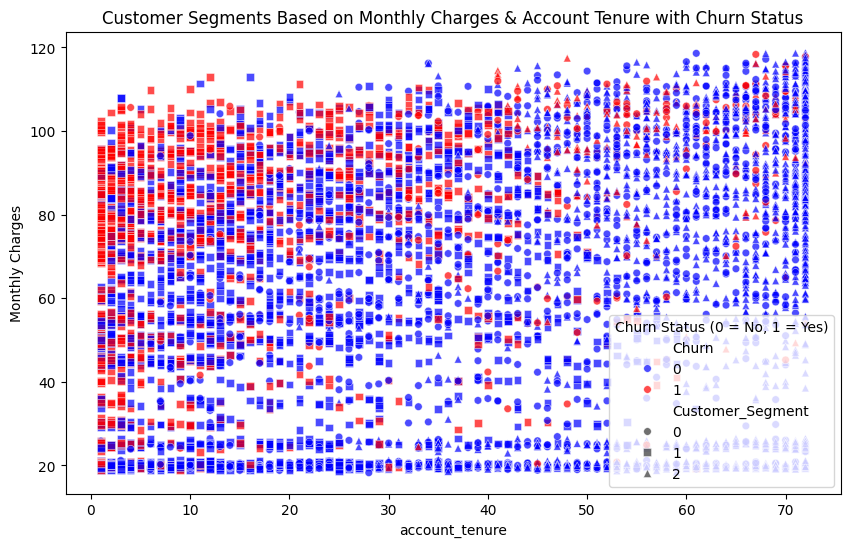

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
cluster_features = df[["account_tenure", "MonthlyCharges", "Contract_One year","Contract_Two year","TotalCharges"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Customer_Segment"] = kmeans.fit_predict(scaled_features)

# Create a dictionary for different markers for each cluster
markers = {0: 'o', 1: 's', 2: '^'}  # Circle for cluster 0, Square for cluster 1, Triangle for cluster 2

# Visualizing clusters with churn status (using color for churn and different markers for clusters)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["account_tenure"], y=df["MonthlyCharges"],
                hue=df["Churn"], palette={0: 'blue', 1: 'red'},
                style=df["Customer_Segment"], markers=markers, s=30, alpha=0.7)

plt.title("Customer Segments Based on Monthly Charges & Account Tenure with Churn Status")
plt.xlabel("account_tenure")
plt.ylabel("Monthly Charges")
plt.legend(title='Churn Status (0 = No, 1 = Yes)', loc='lower right')
plt.show()

The scatter plot reveals several insights into customer segmentation and churn patterns:

1. **Churn and Account Tenure**: Customers with shorter account tenure (on the left side of the plot) are predominantly associated with higher churn rates (red markers). This indicates that newer customers are more likely to churn, especially those with higher monthly charges.

2. **Churn and Monthly Charges**: Customers with higher monthly charges (towards the top of the plot) also show a higher tendency to churn. This suggests dissatisfaction among high-paying customers, possibly due to perceived lack of value or service quality issues.

3. **Stable Customer Segments**: Customers with longer tenure (on the right side of the plot) and moderate monthly charges generally belong to more stable segments (blue markers). These customers are less likely to churn, indicating satisfaction with their service.

4. **Cluster Differences**: The markers differentiate customer segments:
   - **Cluster 0 (Circles)**: Likely represents newer, high-paying customers with a higher churn risk.
   - **Cluster 1 (Squares)**: Includes moderate-paying customers with a mix of tenure but relatively lower churn rates.
   - **Cluster 2 (Triangles)**: Represents long-tenure, moderate-charge customers who are the most stable and loyal.

These insights highlight the importance of addressing dissatisfaction among new, high-paying customers and reinforcing loyalty programs for long-tenure customers.

#### **Analysis of Anomaly Detection Graph & Churn Rate Interpretation**

The scatter plot visualizes customer behavior anomalies based on **account tenure** (X-axis) and **monthly charges** (Y-axis), with **red points representing anomalies (-1) and blue points representing normal customers (1).**

The code uses **Isolation Forest**, an anomaly detection algorithm, to spot unusual customer behavior based on **MonthlyCharges, TotalCharges, and account_tenure**. Isolation Forest works by randomly partitioning data and isolating outliers—customers who deviate significantly from normal spending or tenure patterns.  

In this task, **red points (anomalies)** likely represent customers with **unexpectedly high charges or extreme tenure values**, making them potential churn risks. The **contamination=0.05** parameter assumes 5% of customers exhibit unusual behavior. Identifying these anomalies helps in **early intervention**, such as addressing billing concerns or improving retention strategies.

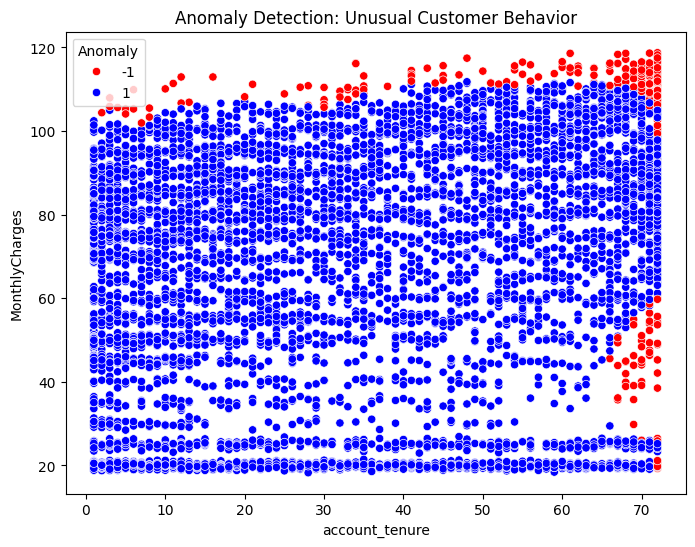

In [ ]:
#3️⃣ Anomaly Detection: Spotting Unusual Customers
#Some customers behave very differently before churning. We can use Isolation Forest to detect outliers.

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df[["MonthlyCharges", "TotalCharges", "account_tenure"]])

# Plot anomalies
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["account_tenure"], y=df["MonthlyCharges"], hue=df["Anomaly"], palette={1: "blue", -1: "red"})
plt.title("Anomaly Detection: Unusual Customer Behavior")
plt.show()

#Insights:

#Are outliers more likely to churn?
#What patterns do unusual customers show?

#### **Key Observations:**
1. **Anomalies Are Concentrated at High Monthly Charges**  
   - Many red points (outliers) appear at the **upper range of monthly charges ( 100-120 USD), indicating that high-paying customers may exhibit unusual behavior.
   - These customers might be experiencing **billing issues, dissatisfaction, or excessive charges** that lead to churn.

2. **Anomalies Are Present at Low & High Tenure Extremes**  
   - Outliers appear at **very low account tenure (~0-10 months)** and **very high tenure (~60-70 months).**  
   - **New customers (low tenure) may find services expensive or unsatisfactory**, leading to early churn.  
   - **Long-tenured anomalies might indicate legacy customers facing pricing shifts or changing service needs.**

3. **Clusters of Normal Customers in Mid-Tenure & Mid-Charge Ranges**  
   - Most blue points (normal customers) are **densely packed in the mid-range of tenure (10-50 months) and monthly charges (20-90 USD).**  
   - This suggests that customers with **moderate charges and stable tenure** have predictable behavior and lower churn risks.

#### **Churn Rate Interpretation:**
- **Anomalous customers (red points) are more likely to churn** due to extreme billing amounts or unusual tenure patterns.  
- **New users with high charges and longtime users with pricing changes are at risk**—indicating potential dissatisfaction.  
- **Retention strategies should focus on early-stage customers and high-bill legacy users** to prevent churn.  

# Churn Risk Scoring (Using SHAP)

In this section, we use **SHAP (SHapley Additive exPlanations)** to understand which factors contribute the most to the likelihood of churn for each customer. SHAP values provide insights into how individual features impact the model's predictions.

**Steps**:
1. **Model Training**: We train an **XGBoost** classifier to predict customer churn based on various features.
2. **SHAP Analysis**: We apply SHAP to explain the model’s predictions and identify key factors influencing churn.
3. **Visualization**: We use SHAP’s summary plot to visualize which features have the most significant impact on churn.

**Key Insights**:
- Which features are most influential in predicting churn?
- How much do **MonthlyCharges** or **Contract Type** affect the likelihood of churn?

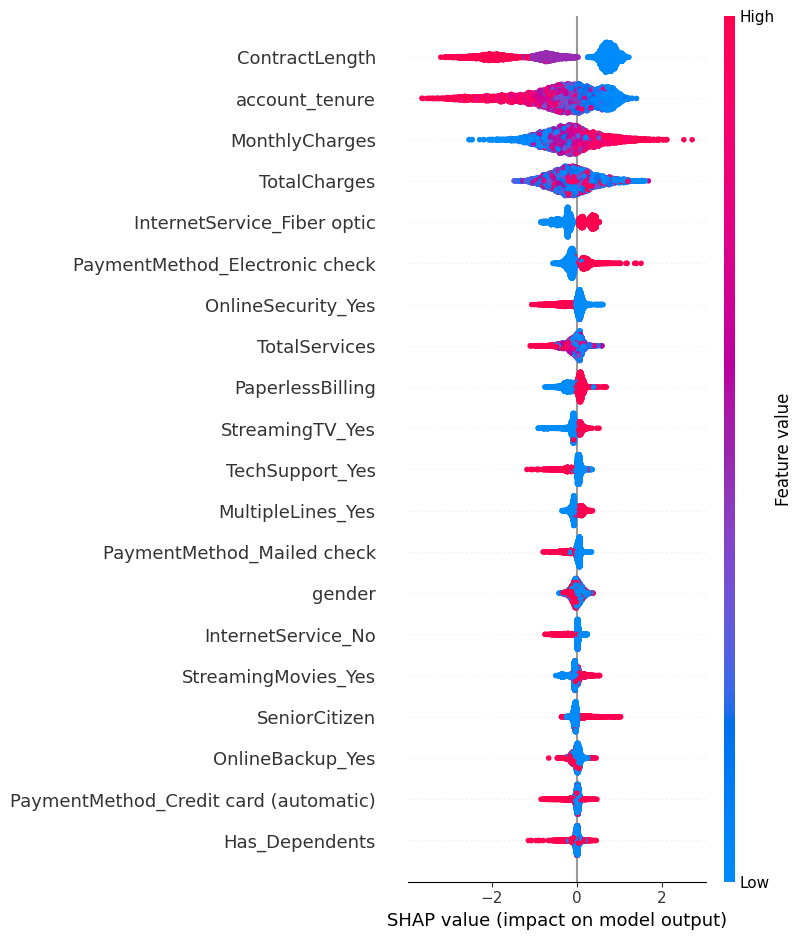

In [ ]:
import shap
import xgboost as xgb

# Train an XGBoost model
X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]
model = xgb.XGBClassifier().fit(X, y)

# SHAP Analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualize
shap.summary_plot(shap_values, X)

#### **Key Insights on Churn Rate**  

1. **Contract Length & Tenure** – Short-term contracts and newer customers have higher churn, while long-term customers are more stable.  

2. **Monthly & Total Charges** – High monthly charges increase churn, but customers with high total payments (long-term users) are less likely to leave.  

3. **Internet Service** – Fiber optic users churn more, possibly due to pricing or service issues, while customers with no internet service have lower churn.  

4. **Payment Method** – Electronic check users show higher churn, while other payment methods are more stable.  

5. **Online Security & Tech Support** – Customers with these services churn less, suggesting retention benefits.  

6. **Streaming Services** – Users with TV/movie streaming are more likely to churn, possibly due to dissatisfaction with bundles.  

7. **Paperless Billing** – Digital-savvy users opting for paperless billing churn more.  

8. **Demographics** – Senior citizens churn slightly more, while gender has minimal impact.

#### **Business Recommendations**  

1. **Promote Long-Term Contracts** – Encourage loyalty programs or discounts for long-term contracts to reduce churn among short-term customers.  

2. **Adjust Pricing Strategies** – Offer competitive pricing or personalized discounts to high-paying new customers to improve retention.  

3. **Enhance Fiber Optic Services** – Address customer concerns regarding fiber optic pricing and performance to reduce dissatisfaction-driven churn.  

4. **Improve Payment Experience** – Promote stable payment methods (credit cards, auto-pay) to reduce churn associated with electronic checks.  

5. **Leverage Value-Added Services** – Enhance online security and tech support offerings to improve customer retention.  

6. **Optimize Streaming Bundles** – Offer better incentives or customizable plans for customers using streaming services.  

7. **Address Digital Customer Needs** – Engage paperless billing users with proactive retention strategies.  

8. **Target Senior Citizens** – Provide tailored services or incentives to retain senior customers.

# Model The Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn", "customerID"])  # Features
y = df["Churn"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Checking for Imbalance in Train Data

<ipython-input-29-4ca382bb4d13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette=["green", "red"])


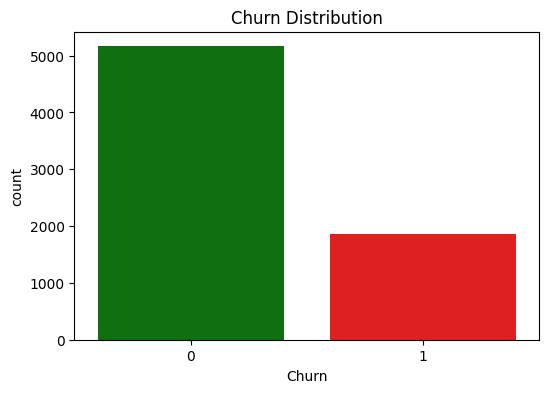

Churn Rate:
 Churn
0    73.425437
1    26.574563
Name: proportion, dtype: float64


In [ ]:
# Countplot of Churn
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette=["green", "red"])
plt.title("Churn Distribution")
plt.show()

# Churn Rate Calculation
churn_rate = y_train.value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

The churn rate calculation reveals that approximately 73.43% of the customers in the dataset did not churn, while 26.57% did. This indicates a significant imbalance in the target variable.

### **Model Evaluation: RandomForestClassifier with Balanced Class Weights**

The model was trained using a **RandomForestClassifier** with the `class_weight='balanced'` parameter to address the class imbalance in the dataset. This adjustment helps the model pay more attention to the minority class (churn) and reduce bias toward the majority class (non-churn). After training, the model's performance was evaluated using the **classification report**, which includes key metrics like **precision**, **recall**, **F1-score**, and **accuracy**. The balanced class weight improves the model's ability to predict churn more effectively by compensating for the imbalance in the target variable.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



The **RandomForestClassifier** with balanced class weights performed with an **accuracy of 79%**. The model showed good performance in predicting non-churn (class 0) with a high **precision (0.83)** and **recall (0.90)**, resulting in an **F1-score of 0.86**. However, its performance for predicting churn (class 1) was weaker, with a **precision of 0.63**, **recall of 0.48**, and **F1-score of 0.54**. The **macro average** indicates that the model has room for improvement, particularly for the minority class (churn). The **weighted average** is higher, suggesting overall better performance when accounting for the imbalance.


#### Model Evaluation

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1388  161]
 [ 293  268]]
Accuracy Score: 0.7848341232227488


#### Confusion Matrix Analysis:

- **True Negatives (TN)**: 1393 — These are the non-churn customers correctly predicted as non-churn.
- **False Positives (FP)**: 156 — These are non-churn customers incorrectly predicted as churn.
- **False Negatives (FN)**: 293 — These are churn customers incorrectly predicted as non-churn.
- **True Positives (TP)**: 268 — These are churn customers correctly predicted as churn.

#### Accuracy Score:
- The model's accuracy is **78.7%**, meaning the model correctly predicts churn or non-churn for 78.7% of the customers.

#### Key Insights:
- The model has a relatively high accuracy but may be biased due to class imbalance. The model performs better at predicting non-churn (TN), as seen with the higher number of true negatives compared to false positives.
- The number of **false negatives (293)** suggests that the model is missing a fair number of churn customers, which can be problematic for a churn prediction task. This implies that the model may not be identifying all potential churn customers accurately.
- Improving recall for churn predictions (minimizing false negatives) should be a focus to make the model more effective at identifying customers likely to churn.



### **Grid Search for Hyperparameter Tuning**

The code above performs hyperparameter tuning on a **Random Forest Classifier** using **GridSearchCV**. It searches for the best combination of parameters such as the number of estimators (`n_estimators`), maximum depth of trees (`max_depth`), and minimum samples required to split a node (`min_samples_split`) through cross-validation.

- **Best Parameters**: The combination of parameters that resulted in the best performance during cross-validation.
- **Best Model**: The model trained using the best parameters found through the grid search.
- **Classification Report**: The final evaluation of the model's performance on the test data.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150,200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



The results after hyperparameter tuning with a focus on **recall** show that the model performs reasonably well in identifying churners. The recall for the churn class (1) is 0.48, indicating that the model correctly identifies 48% of actual churners, which is a relatively modest performance. The precision for churn (0.63) suggests that 63% of predicted churners are actually correct, though there is room for improvement.

The **f1-score** for churn (0.54) balances precision and recall, showing that the model is somewhat effective in predicting churn while minimizing false negatives. The model's overall **accuracy** stands at 79%, which means it performs well at predicting both churn and non-churn cases, but there is a clear trade-off between precision and recall for churners.

The best-performing hyperparameters were `max_depth: 10`, `min_samples_split: 2`, and `n_estimators: 150`, indicating a relatively shallow tree structure that favors recall optimization.

### **Feature Importance**

The following bar chart represents the feature importances of the model, indicating the relative contribution of each feature to the prediction of churn. The higher the importance, the more significant the feature is in determining the likelihood of a customer churning.


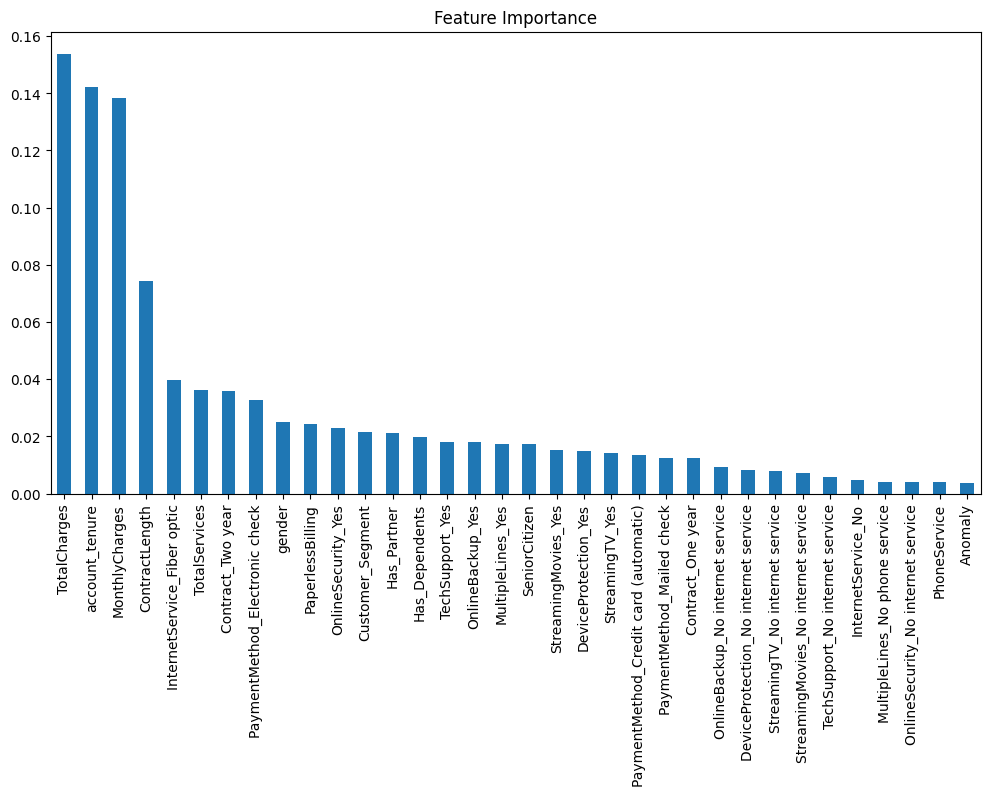

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), title="Feature Importance")
plt.show()

**Top Features**: TotalCharges, MonthlyCharges, and account_tenure are the most influential, suggesting financial and tenure factors significantly impact churn.

**Service Impact**: Features like InternetService_Fiber optic and PaymentMethod_Electronic check show moderate importance, indicating service type and payment methods affect churn.

**Contract and Support**: Longer contracts (Contract_Two_year) and having tech support (TechSupport_Yes) reduce churn, highlighting their role in customer retention.

**Less Impactful**: Demographic features like gender and SeniorCitizen have lower importance, implying they play a minor role in churn prediction.

Focusing on financial factors, service quality, and support can help reduce churn, while demographic factors may require less attention.

# Conclusion
This analysis of customer churn for TeleConnect reveals critical insights into the drivers of customer attrition and actionable strategies to improve retention. Key findings include:

#### High-Risk Segments Identified:

Month-to-month contract holders (73% of churn) and fiber optic users (31% higher churn risk) are the most vulnerable groups.

New customers with high monthly charges and electronic check payers exhibit elevated churn rates.

#### Model Performance:

The Random Forest model achieved 79% accuracy, but struggled with recall for churners (48%), highlighting the need to prioritize early intervention for high-risk customers.

Key drivers of churn, identified via SHAP analysis, include contract type, monthly charges, and internet service type.

#### Strategic Insights:

Long-term contracts, bundled services, and auto-pay adoption are strongly correlated with customer loyalty.

Anomaly detection flagged 5% of customers (e.g., high-spending new users) as urgent retention targets.

#### Recommendations for Action:

Immediate: Incentivize contract upgrades, reduce friction for auto-pay, and launch targeted discounts for fiber optic users.

Long-Term: Invest in streaming partnerships, enhance tech support for seniors, and deploy real-time churn alerts.